# **Setup**
 
Reset the Python environment to clear it of any previously loaded variables, functions, or libraries. Then, import the libraries needed to complete the code Professor Melnikov presented in the video.

In [1]:
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS
IS.ast_node_interactivity = "all"    # allows multiple outputs from a cell
import numpy as np, nltk, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

<hr style="border-top: 2px solid #606366; background: transparent;">

# **Review**

In this notebook, you will build a TF-IDF matrix from a list of famous quotes about language then use these quotes to locate the most similar quotes using the metrics we have learned earlier.

Load the list of famous quotes about language.

In [2]:
LsQuote = [
    "A different language is a different vision of life.", # Federico Fellini
    "The limits of my language mean the limits of my world.",     # Ludwig Wittgenstein
    "One language sets you in a corridor for life. Two languages open every door along the way.",  # Frank Smith
    "He who knows no foreign languages knows nothing of his own.",  # Johann Wolfgang von Goethe
    "You can never understand one language until you understand at least two.",  # Geoffrey Willans
    "To have another language is to possess a second soul.",      # Charlemagne
    "Change your language and you change your thoughts.",         # Karl Albrecht
    "Knowledge of languages is the doorway to wisdom.",           # Roger Bacon
    "Language is the blood of the soul into which thoughts run and out of which they grow.",  # Oliver Wendell Holmes
    "Learn a new language and get a new soul.",                   # Czech Proverb
    "A special kind of beauty exists which is born in language, of language, and for language.",  # Gaston Bachelard
    "Learning is a treasure that will follow its owner everywhere.",  # Chinese Proverb
    "One should not aim at being possible to understand but at being impossible to misunderstand.",  # Marcus Fabius Quintilian
    "A mistake is to commit a misunderstanding.",                 # Bob Dylan
    "Language is to the mind more than light is to the eye."     # William Gibson
]

Filter out stopwords from the quotes and lowercase all words. Build a TF-IDF matrix using the quotes and these words (15 rows and 48 columns). Package the matrix as a DataFrame for easy manipulation and presentation and plot all TF-IDF weights using Seaborn's heatmap.

(15, 48)

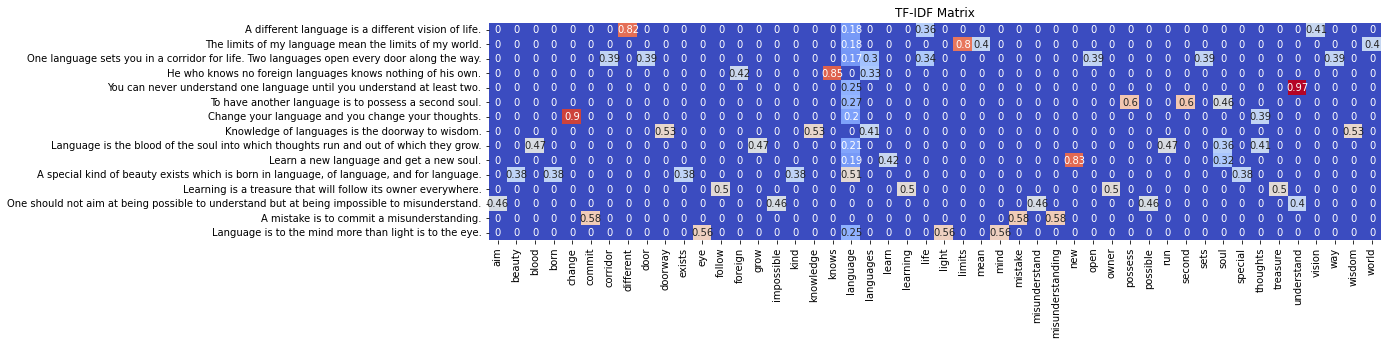

In [3]:
tv = TfidfVectorizer(stop_words='english', lowercase=True)
smTI = tv.fit_transform(LsQuote)

dfTI = pd.DataFrame(smTI.toarray(), index=LsQuote, columns=tv.get_feature_names())
plt.rcParams['figure.figsize'] = [16, 4]   # plot wider figures
ax = sns.heatmap(dfTI, annot=True, cmap='coolwarm', cbar=False);
tmp = ax.set_title('TF-IDF Matrix');
dfTI.shape

## Calculating the Cosine Similarity of Documents

Cosine similarity is a pairwise metric that takes two vectors and produces a single scalar value indicative of the vectors' similarity (or the degree of their linear relation). 

To compare each document to every other document, all possible pairs of cosine similarities must be computed. This can be done using a double loop to iterate over rows of the TF-IDF matrix while iterating over columns of the same matrix. 

Alternatively, you can use the `cosine_similarity()` function to compute the matrix of cosine similarities in one step.

If the table and sentences are too small to read, you can investigate the image in a separate tab of the web browser. Simply right-click on the image below and select **Open Image in New Tab**.

(15, 15)

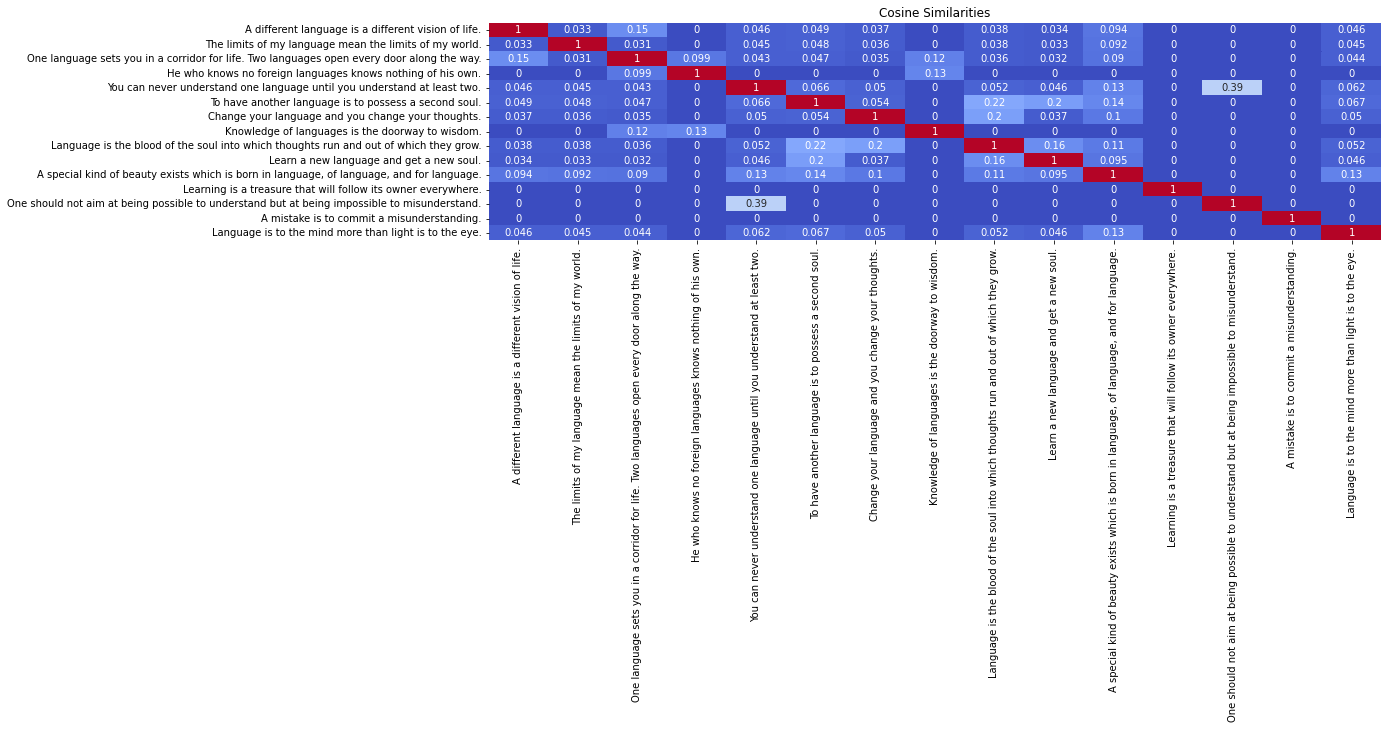

In [4]:
CS = cosine_similarity(dfTI)               # matrix of cosine similarities
dfCS = pd.DataFrame(CS, index=LsQuote, columns=LsQuote)
plt.rcParams['figure.figsize'] = [16, 4]   # plot wider figures
ax = sns.heatmap(dfCS, annot=True, cmap='coolwarm', cbar=False);
tmp = ax.set_title('Cosine Similarities');
dfCS.shape

The resulting matrix of pairwise cosine similarities is symmetric, since cosine similarity is a [commutative](https://en.wikipedia.org/wiki/Commutative_property) operator (i.e., $CosSim(x,y) = CosSim(y,x)$). Its diagonal values are 1s, since a cosine similarity of a vector with itself is 1.

To identify the most similar quotes, find the highest cosine similarity value in the matrix (0.39). If you need to find the quote most similar to the first quote, "A different language is a different vision of life," then look for the largest number in the first row (0.15). The two corresponding quotes have two words in common, "language" and "life." While the former is generic in this list of quotes and has low weight, the latter has relatively high weight.
    
To compute a cosine similarity, both documents must be represented by vectors in the TF-IDF matrix, where weights are computed in the presence of all the other documents. If you add another quote, the weights may change. For example, if you add another 100 quotes unrelated to "language," then the weight of this word will increase as it will no longer be generic. 

## Drawbacks of Using Similarities Computed From a TF-IDF Matrix

Consider a TF-IDF matrix built from billions of documents (e.g., web pages). To search and find the most similar document with some arbitrary query phrase, you first need to add the query to TF-IDF, recompute the weights, and then identify documents that have their vectors closest to the query vector. This is computationally difficult and intractable for, say, a web search engine which handles billions of searches per minute. This is one drawback with TF-IDF: It is not meant for online query processing but works well when queries are infrequent. 

One way to circumvent this problem is to recognize that by adding a new document to a very large TF-IDF matrix, the weights would not change significantly. So, the query document's weights could be approximated. This is an interesting topic but outside of the scope of our course. Later you will learn different techniques that you can use to search a set of document vectors without recomputing the vectors.

<hr style="border-top: 2px solid #606366; background: transparent;">

# **Optional Practice**

Now, equipped with these concepts and tools, you will complete a few related tasks.

As you work through these tasks, check your answers by running your code in the *#check solution here* cell, to see if you’ve gotten the correct result. If you get stuck on a task, click the See **solution** drop-down to view the answer.

# Task 1

Above you used the `dfCS` square matrix to visually identify a sentence that is most cosine-similar to "A different language is a different vision of life." Here, you need to do this automatically (programmatically). 

Given an index `ix=0`, find the sentence that is most similar to the one identified by the index and return the resulting cosine similarity.

<b>Hint:</b> You must first extract the row (or column) corresponding to the given index. Then, find the index of the largest cosine similarity, ignoring the one containing cosine similarity of 1, since we are not interested in finding the query document itself. Instead you should use a query document (and its vector) to identify the nearest other document. Once you find the index of the candidate quote, use it to retrieve the quote itself.

In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
<pre>
ix = 0
sQuote = dfCS.index[ix]
dfCS.drop(sQuote).iloc[:,ix].sort_values()[[-1]]
    </pre>
    </details> 
</font>
<hr>

## Task 2

Given the `dfCS` square matrix (or DataFrame) of cosine similarities, find the largest cosine similarity and the two sentences responsible. 

Note: You will ignore one-half of this matrix including the diagonal terms (which are not meaningful). 

<b>Hint:</b> You must focus your search in either the upper or lower triangular, ignoring the diagonal values. There are many ways to do this. Here is one: Look up NumPy documentation for <code>np.triu()</code>, which returns the argument matrix with lower triangular values zeroed out. The function also allows you to skip the diagonal. You can then search for the maximal value's index using <code>argmax()</code> applied to the resulting matrix. This will not return a row/column index but a linear index (a single integer) that can be converted to row/column index using <code>np.unravel_index()</code> method. Once you have these indices, you can extract the cosine similarity from <code>dfCS</code> and the quotes responsible for this largest cosine similarity.


In [ ]:
# check solution here

<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
<pre>
np.set_printoptions(linewidth=10000, precision=2, edgeitems=20, suppress=True)
mUT = np.triu(dfCS, k=1)
ix = mUT.argmax(axis=None)  # this is a single integer index, which needs to be unraveled into 2D index
rix, cix = np.unravel_index(ix, mUT.shape)  # row and column indices
print(f'Highest cosine similarity: ', mUT[rix, cix])
dfCS.index[rix]
dfCS.index[cix]
    </pre>
    </details> 
</font>
<hr>